# Prediction Of Quality Of Wine Using Machine Learning

Team Members:



B.Kranthi Kiran(16311A05Q4)




G.Rishitha Reddy(16311A05R6)



T.Shivani Reddy(16311A05V7)

### Step-1 : Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Step-2 : Loading Dataset

In [2]:
wine = pd.read_csv('winequality-red.csv')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Step-3 : Data Preprocessing

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


***Extracting Independent and Dependent Variables***

In [5]:
X = wine.iloc[:,:-1].values # independent variable
y = wine.iloc[:,-1].values # dependent variable

##### Box Plot Visualization

In [6]:
plt.style.use('fivethirtyeight')

In [7]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

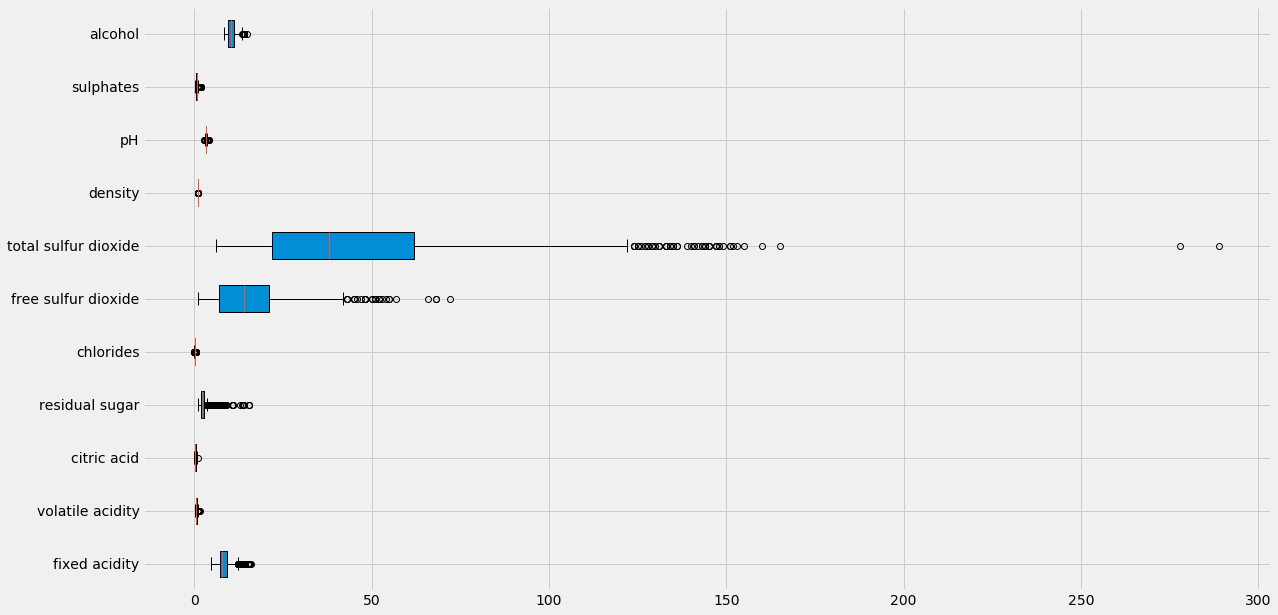

In [8]:
fig = plt.figure(figsize=(18,10))
plt.boxplot(X, vert = False,labels= ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'], patch_artist=True)
plt.show()

***Check relation between variables by using Correlation techniques:***


In [9]:
corr = wine.corr()

In [10]:
import seaborn as sns

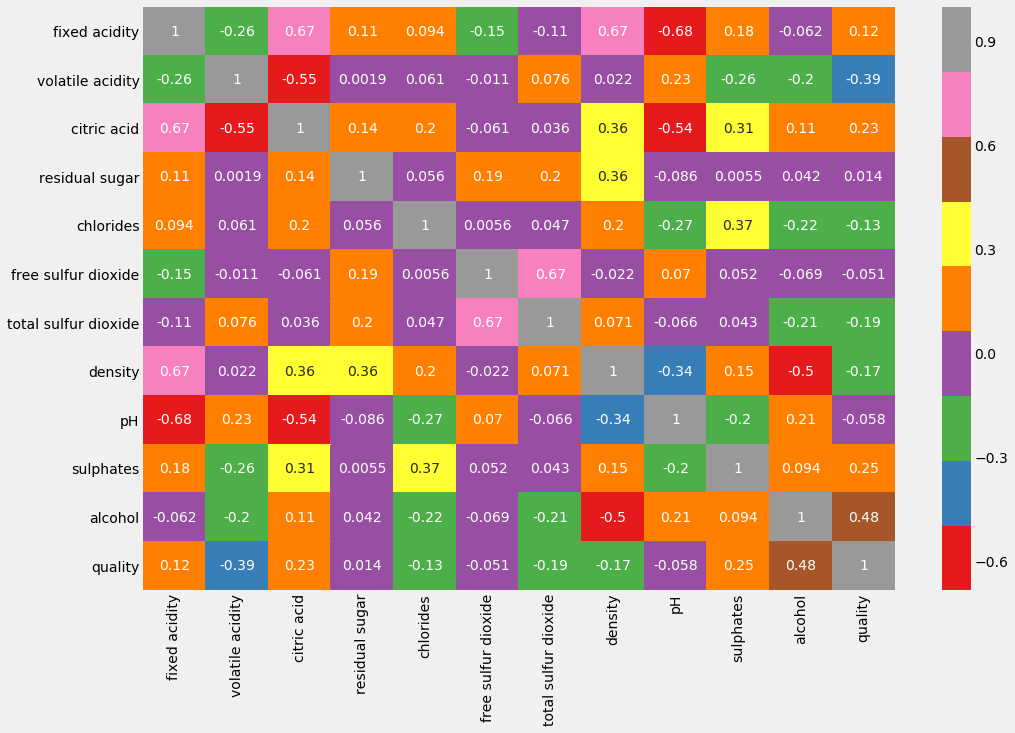

In [11]:
plt.figure(figsize = (15,10))
sns.heatmap(corr,annot = True,cmap = 'Set1')
plt.show()

***Min Max Scaling***

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
sc = MinMaxScaler(feature_range=(0,1))

In [14]:
X_new = sc.fit_transform(X)
X_new

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

In [15]:
X_new[0]

array([0.24778761, 0.39726027, 0.        , 0.06849315, 0.10684474,
       0.14084507, 0.09893993, 0.56754772, 0.60629921, 0.13772455,
       0.15384615])

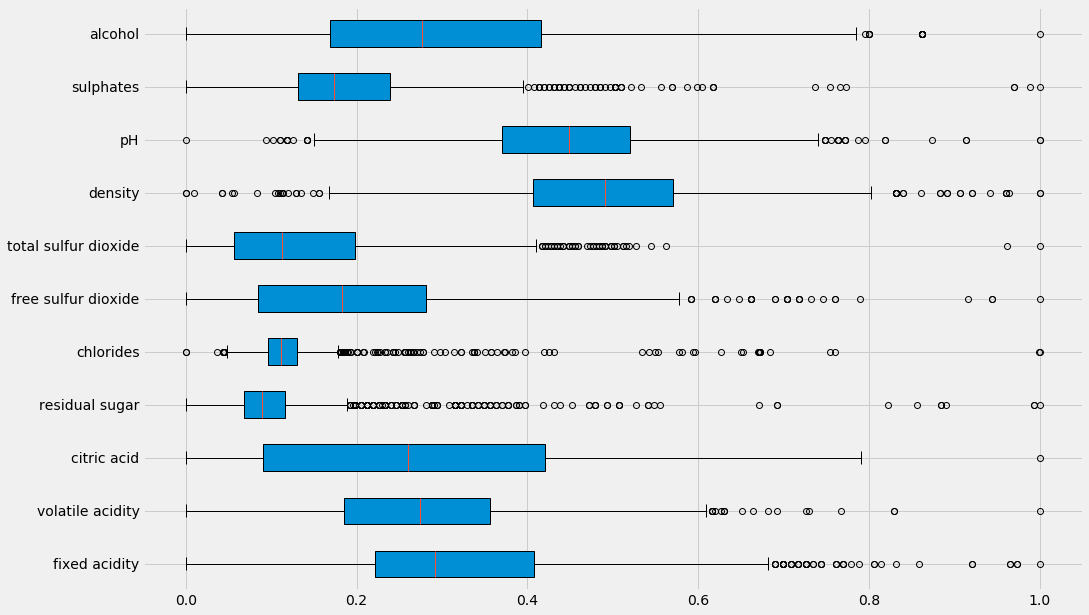

In [16]:
fig = plt.figure(figsize=(15,10))
plt.boxplot(X_new, vert = False,labels= ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'], patch_artist=True)
plt.show()

In [17]:
mx = sc.data_max_
mn = sc.data_min_

In [18]:
np.savez('scale.npz',mn,mx)

In [19]:
print(mx)
print(mn)

[ 15.9       1.58      1.       15.5       0.611    72.      289.
   1.00369   4.01      2.       14.9    ]
[4.6     0.12    0.      0.9     0.012   1.      6.      0.99007 2.74
 0.33    8.4    ]


### Step-4 : Spilting Data into training and testing dataset

In [20]:
from sklearn.cross_validation import train_test_split

C:\Users\versi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
x_train, x_test, y_train, y_test = train_test_split(X_new,y, test_size = 0.2,
                                                   random_state =0)

In [22]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1279, 11), (1279,), (320, 11), (320,))

### Step-5 : Building Machine Learning model

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [24]:
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier(n_estimators=100)

##### Traning the Model

In [25]:
model_dt.fit(x_train, y_train) # training model
model_rf.fit(x_train, y_train) # training model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Step-6 : Evaluation of the model 

In [26]:
y_pred_dt = model_dt.predict(x_test) # we use this for evaluation
y_pred_rf = model_rf.predict(x_test) # we use this for evaluation

##### Classification Metrics 

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
cm_dt = confusion_matrix(y_test, y_pred_dt) # confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf) # confusion matrix

cr_dt = classification_report(y_test, y_pred_dt) # classification report
cr_rf = classification_report(y_test, y_pred_rf) # classification report

C:\Users\versi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
import seaborn as sns

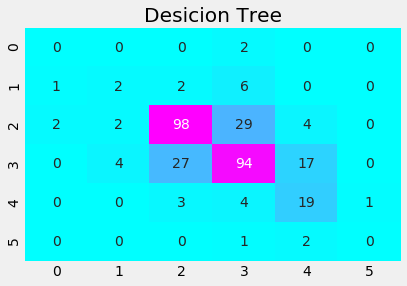

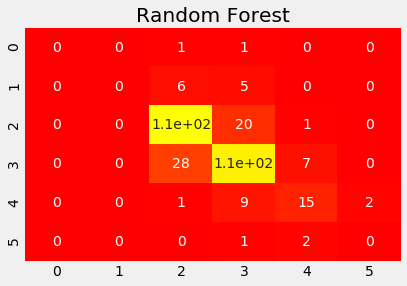

In [30]:
sns.heatmap(cm_dt,annot=True,cbar=None,cmap = 'cool')
plt.title('Desicion Tree')
plt.show()

sns.heatmap(cm_rf,annot=True,cbar=None,cmap = 'autumn')
plt.title('Random Forest')
plt.show()

In [32]:
print('='*20+'Desicion Tree'+'='*20)
print(cr_dt)

print('='*20+'Random Forest'+'='*20)
print(cr_rf)

====================Desicion Tree====================
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.25      0.18      0.21        11
          5       0.75      0.73      0.74       135
          6       0.69      0.66      0.68       142
          7       0.45      0.70      0.55        27
          8       0.00      0.00      0.00         3

avg / total       0.67      0.67      0.67       320

====================Random Forest====================
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00        11
          5       0.76      0.84      0.80       135
          6       0.75      0.75      0.75       142
          7       0.60      0.56      0.58        27
          8       0.00      0.00      0.00         3

avg / total       0.70      0.74      0.72       320



***We got the accuracy of 70% while we use the Random Forest algorithm***